<a href="https://colab.research.google.com/github/pranabsarma18/Machine-Learning-in-Practice/blob/main/MLP_W2_SWI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Task 1

1. Import `SimpleImputer` from SkLearn library.
2. Take a matrix [[753, 1622, 3193], [np.nan, np.nan, 1966], [1200, 5, np.nan],[981, np.nan, 9211]]
3. Impute the missing values in the matrix using `SimpleImputer` with 
   - Mean
   - Median
4. Print the imputed matrix using `fit_transform`. Do you see any change in results between imputing with mean and imputing with median?

In [2]:
X = np.array([[753, 1622, 3193], [np.nan, np.nan, 1966], [1200, 5, np.nan],[981, np.nan, 9211]])

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
si_mean = SimpleImputer(strategy='mean')
X_tr = si_mean.fit_transform(X)
X_tr

array([[7.530e+02, 1.622e+03, 3.193e+03],
       [9.780e+02, 8.135e+02, 1.966e+03],
       [1.200e+03, 5.000e+00, 4.790e+03],
       [9.810e+02, 8.135e+02, 9.211e+03]])

In [5]:
si_median = SimpleImputer(strategy='median')
X_tr = si_median.fit_transform(X)
X_tr

array([[7.530e+02, 1.622e+03, 3.193e+03],
       [9.810e+02, 8.135e+02, 1.966e+03],
       [1.200e+03, 5.000e+00, 3.193e+03],
       [9.810e+02, 8.135e+02, 9.211e+03]])

#Task 2
1. Import `FunctionTransformer` from the SkLearn library.
2. Apply log base 10 to the elements of the following array : `[[0, 1], [2, 3],[10,100]]` and print it

In [6]:
from sklearn.preprocessing import FunctionTransformer

In [7]:
X = np.array([[0, 1], [2, 3],[10,100]])

In [8]:
log_transormer = FunctionTransformer(np.log10)

In [9]:
X_tr = log_transormer.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: divide by zero encountered in log10
  return func(X, **(kw_args if kw_args else {}))


In [10]:
X_tr

array([[      -inf, 0.        ],
       [0.30103   , 0.47712125],
       [1.        , 2.        ]])

#Task 3
1. Read the CSV file from `https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data`, define the column headers as `'sepal length', 'sepal width', 'petal length', 'petal width','label'` and generate 
- a Kernel Densiy Estimation (KDE) plot.
- a boxplot
- a violin plot
- generate the correlation plot between each pair of features.
2. Generate a new feature matrix consisting of all polynomial combinations of the features with degree 2 
(`For example, if an input sample is two dimensional and of the form  [a,b] , the degree-2 polynomial features are`  $[1,a,b,a^2,ab,b^2]$) and print the shapes of the feature matrix before and after the polynomial transformation.
 

In [11]:
iris_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width','label']
iris_data = pd.read_csv(iris_data_url, names=col_names)
iris_data

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


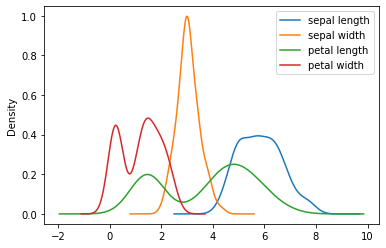

In [12]:
ax = iris_data.plot.kde()

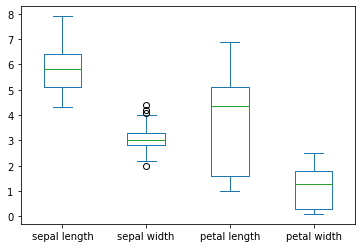

In [13]:
ay = iris_data.plot.box()

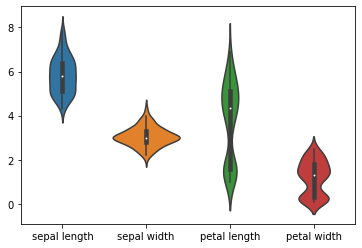

In [14]:
import seaborn as sns

az = sns.violinplot(data=iris_data, scale='area')

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_transformer = PolynomialFeatures(degree=2)
iris_poly = poly_transformer.fit_transform(iris_data.iloc[:,:4])

In [17]:
iris_poly.shape

(150, 15)

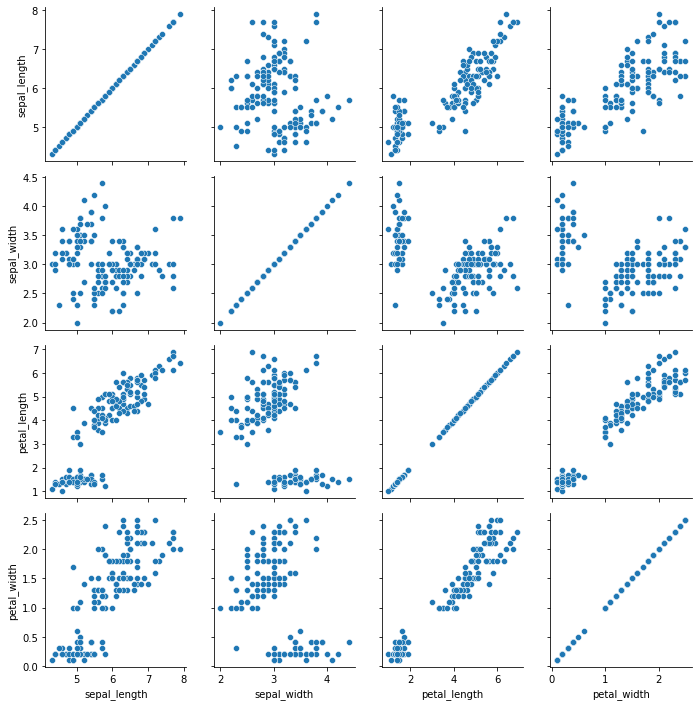

In [18]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

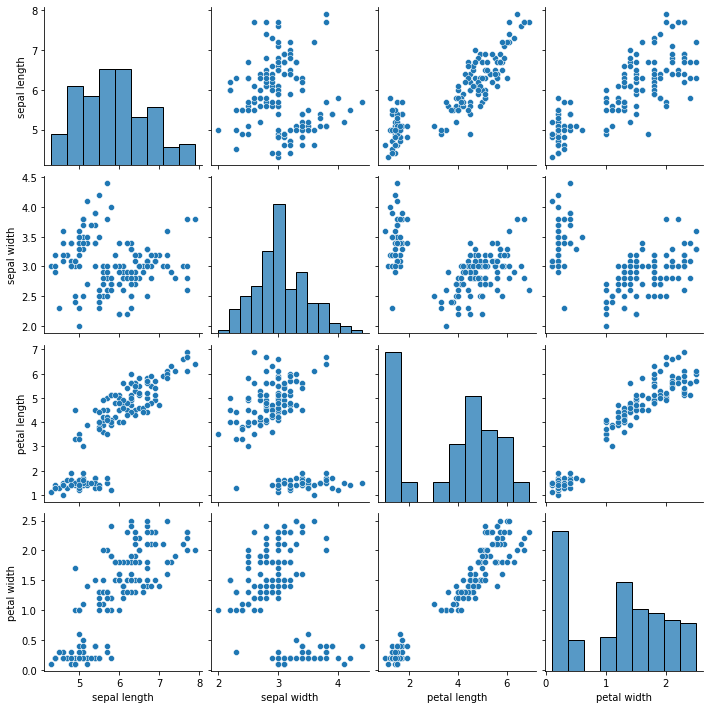

In [19]:
# Create a pairplot of iris dataset
sns.pairplot(data=iris_data)

#Task 4
1. Import `OneHotEncoder` class from `sklearn.preprocessing` module.
2. Print shapes of the matrix before and after one-hot-encoding.
3. Print 45 to 55th row of the matrix after one-hot-encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
print("Shape of the ctegorical feature before one-hot-encoding: ", iris_data.label.shape)
one_hot = OneHotEncoder()
label_tr = one_hot.fit_transform(iris_data[['label']])
print("Shape of the ctegorical feature after one-hot-encoding: ", label_tr.shape)

Shape of the ctegorical feature before one-hot-encoding:  (150,)
Shape of the ctegorical feature after one-hot-encoding:  (150, 3)


In [22]:
label_tr.toarray()[45:55]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

#Task 5
1. Import the California Housing dataset and ` SelectPercentile, mutual_info_regression`. 
2. Select features according to 10 percentile of the highest scores
3. Print shapes of the feature matrix before and after feature selection.

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, chi2

In [24]:
X, y = fetch_california_housing(return_X_y=True)

In [25]:
sp = SelectPercentile(mutual_info_regression, percentile = 10)
print(f'Shape of of feature matrix before feature selection:{X.shape}')
X_new = sp.fit_transform(X,y)
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')

Shape of of feature matrix before feature selection:(20640, 8)
Shape of of feature matrix after feature selection:(20640, 1)


# Task 6

- Generate a numeric pipeline using 
1. a `columnTransformer` named `fantastic_4` with a block `passthrough` inside it.
2. a `SimpleImputer` using `mean` strategy and
3. a StandardScaler operator named `std_scaler`.
- Generate a categorical pipeline applying `LabelBinarizer` on the 5th feature.
-Combine these two pipelines using `FeatureUnion` and display the full pipeline diagram.

In [26]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [27]:
num_pipeline = Pipeline([('selector', ColumnTransformer([('fantastic_4', 'passthrough', slice(0,4))])),
                         ('mean_imputer', SimpleImputer(strategy='mean')),
                         ('standard_scalar', StandardScaler())])

cat_pipelien = ColumnTransformer([('label_binarizer', LabelBinarizer(), [4])])

full_pipeline = FeatureUnion([('num_pipeline', num_pipeline),
                              ('cat_pipelien', cat_pipelien)])

In [28]:
from sklearn import set_config
set_config(display='diagram')   
# displays HTML representation in a jupyter context
full_pipeline 

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('fantastic_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('mean_imputer',
                                                 SimpleImputer()),
                                                ('standard_scalar',
                                                 StandardScaler())])),
                               ('cat_pipelien',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

In [53]:
set_config(display='text') # to turn display mode off

#Task 7
Make a pipeline containing `SimpleImputer`, `PCA` and `LinearRegression` estimator steps.
- Print the length of steps
- In PCA step, set no. of principal components to 4. 
- Access the individual steps of the pipeline.
- Print no of components of PCA step via pipeline object.

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [31]:
estimator_pipe = Pipeline([('simple_imputer', SimpleImputer()),
                           ('pca', PCA()),
                           ('linear_regression', LinearRegression())])


In [32]:
estimator_pipe.steps

[('simple_imputer', SimpleImputer()),
 ('pca', PCA()),
 ('linear_regression', LinearRegression())]

In [33]:
estimator_pipe.set_params(pca__n_components=4)

Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('pca', PCA(n_components=4)),
                ('linear_regression', LinearRegression())])

In [34]:
len(estimator_pipe)

3

In [35]:
from sklearn import set_config
set_config(display='diagram')   
# displays HTML representation in a jupyter context
estimator_pipe

Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('pca', PCA(n_components=4)),
                ('linear_regression', LinearRegression())])

# Task 8
1. Import the California housing dataset, Recursive Feature Elimination (RFE) from appropriate modules.
2. Perform wrapper based feature selection using RFE method
3. Print the support attribute and rankings of features.

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import RFE

In [64]:
X, y = fetch_california_housing(return_X_y=True)

In [55]:
rfe = RFE(estimator=LinearRegression())

In [56]:
rfe.fit(X, y)

RFE(estimator=LinearRegression())

In [58]:
rfe.ranking_

array([1, 3, 2, 1, 5, 4, 1, 1])

In [45]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True])

#Task 9
1. Import `SequentialFeatureSelector, KNeighborsClassifier` with 3 features to select and 3 neighbors and load the iris dataset.
2. Perform wrapper based feature selection using SFS method
3. Find the shape of the transformed matrix.

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [67]:
X,y = load_iris(return_X_y = True)

In [68]:
sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors = 3))
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3))

In [69]:
X_new  = sfs.transform(X)
X_new.shape

(150, 2)

In [71]:
sfs.support_

array([ True, False, False,  True])